# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 4: NN3: Implementacja momentu i normalizacji gradientu (1 tydzień, 2 punkty)

Zaimplementować dwa usprawnienia uczenia gradientowego sieci neuronowej:
- moment,
- normalizację gradientu RMSProp.

Porównać szybkość zbieżności procesu uczenia dla obu wariantów.

Przeprowadzić eksperymenty na zbiorach(w nawiasach wartość MSE, aby otrzymać 2 punkty):
- square-large (MSE: 1),
- steps-large (MSE: 3),
- multimodal-large (MSE: 9).

Literatura:
- Uczenie gradientowe z momentem: rozdział 3.2.2 Computational Intelligence, A. P. Engelbrecht

- Normalizacja gradientu: Wykład 6e: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

#### TODO:

- ~~implement learning with moment~~
- ~~implement RMSProp gradient normalization~~


In [1]:
from MultiLayerPerceptron import NeuralNetwork, Layer
import pandas as pd

### Function for visualization of predicted vs original data

In [2]:
import matplotlib.pyplot as plt
def plot_compare_predicted_real(net, x_train,y_train,x_test,y_test):
    xmin = min(x_train+ x_test)[0] *1.1
    xmax = max(x_train+ x_test)[0] *1.1

    fig1, ax = plt.subplots()

    ax.scatter(x_train, y_train, color="green",label="real y")
    ax.scatter(x_train, net.predict(x_train), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - train data")
    ax.set_xlim(xmin, xmax)
    plt.show()

    fig1, ax = plt.subplots()
    ax.scatter(x_test, y_test, color="green",label="real y")
    ax.scatter(x_test, net.predict(x_test), color="red",label="predicted y")
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.title("real vs predicted y - test data")
    plt.show()

## Dataset 1: Square Large

In [3]:
df_train = pd.read_csv('data/regression/square-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x           y
Unnamed: 0                      
1           1.366456   38.048149
2          -0.390025 -116.309280
3           1.090418  -22.988883
4           1.805831  163.492435
5          -0.938124  -50.793090


#### Model 1

In [194]:
net1 = NeuralNetwork()
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=90, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))

In [195]:
net1.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.00003, batch_size=16, \
            with_moment=True, moment_decay=0.993)


Epoch:    1/100,   MSE train:12188.794,   MSE test:12693.532
Epoch:   11/100,   MSE train:  505.932,   MSE test: 2864.137
Epoch:   21/100,   MSE train:   14.289,   MSE test:  705.571
Epoch:   31/100,   MSE train:    7.204,   MSE test:  637.214
Epoch:   41/100,   MSE train:    4.843,   MSE test:  584.979
Epoch:   51/100,   MSE train:    3.619,   MSE test:  546.859
Epoch:   61/100,   MSE train:    2.872,   MSE test:  518.054
Epoch:   71/100,   MSE train:    2.338,   MSE test:  495.524
Epoch:   81/100,   MSE train:     1.93,   MSE test:  477.347
Epoch:   91/100,   MSE train:    1.617,   MSE test:  462.148
Epoch:  100/100,   MSE train:    1.401,   MSE test:  450.243


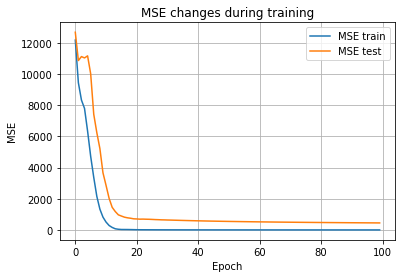

In [196]:
net1.plot_training_history()

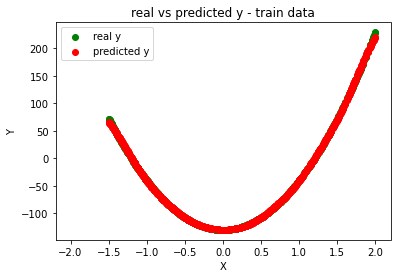

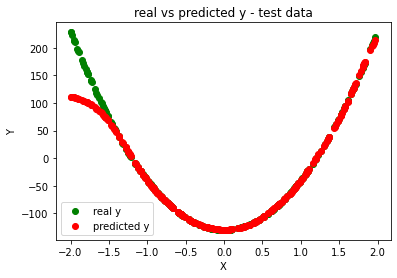

In [197]:
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

Epoch:    1/200,   MSE train:12175.057,   MSE test:12813.679
Epoch:   21/200,   MSE train: 1670.639,   MSE test: 6354.146
Epoch:   41/200,   MSE train:  535.268,   MSE test: 3871.452
Epoch:   61/200,   MSE train:   135.81,   MSE test: 2405.742
Epoch:   81/200,   MSE train:   28.985,   MSE test: 1609.436
Epoch:  101/200,   MSE train:    7.674,   MSE test:  1175.05
Epoch:  121/200,   MSE train:     2.77,   MSE test:  949.281
Epoch:  141/200,   MSE train:    1.279,   MSE test:   812.65
Epoch:  161/200,   MSE train:    0.781,   MSE test:   731.08
Epoch:  181/200,   MSE train:    0.573,   MSE test:  677.298
Epoch:  200/200,   MSE train:    0.456,   MSE test:  639.514


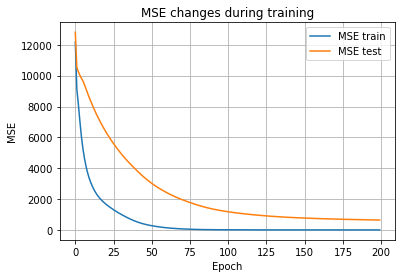

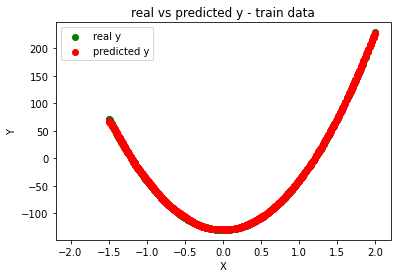

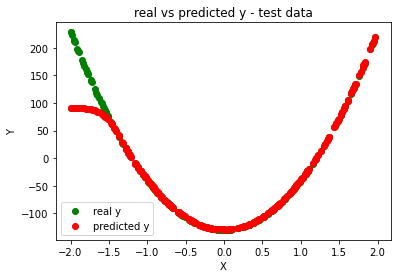

In [4]:
net1 = NeuralNetwork()
net1.add(Layer(neurons_count=1, add_bias=True))
net1.add(Layer(neurons_count=90, activation_fun="sigmoid", add_bias=True))
net1.add(Layer(neurons_count=1, activation_fun="linear", add_bias=False))
net1.train(x_train, y_train,x_test,y_test, epochs=200, learning_rate=0.003, batch_size=3, \
            with_rms_prop=True, rms_prop_decay=0.99)
net1.plot_training_history()
plot_compare_predicted_real(net1, x_train,y_train,x_test,y_test)

## Dataset 2: Steps Large

In [198]:
df_train = pd.read_csv('data/regression/steps-large-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/steps-large-test.csv').set_index("Unnamed: 0")
print(df_test.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

                   x    y
Unnamed: 0               
1           1.706990  160
2          -0.604580  -80
3          -0.674405  -80
4           1.341562   80
5          -1.427434  -80


#### Model 1

In [216]:
net2 = NeuralNetwork()
net2.add(Layer(neurons_count=1, add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=10, activation_fun='sigmoid', add_bias=True))
net2.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [217]:
net2.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.00001, batch_size=4, \
            with_moment=True, moment_decay=0.97)

Epoch:    1/100,   MSE train: 7093.609,   MSE test: 7162.058
Epoch:   11/100,   MSE train:  171.706,   MSE test:  166.513
Epoch:   21/100,   MSE train:   51.834,   MSE test:   51.135
Epoch:   31/100,   MSE train:   38.292,   MSE test:   34.902
Epoch:   41/100,   MSE train:   33.231,   MSE test:   27.456
Epoch:   51/100,   MSE train:   30.762,   MSE test:   23.188
Epoch:   61/100,   MSE train:   29.322,   MSE test:   20.469
Epoch:   71/100,   MSE train:   28.337,   MSE test:   18.561
Epoch:   81/100,   MSE train:   27.635,   MSE test:   17.163
Epoch:   91/100,   MSE train:   27.131,   MSE test:   16.104
Epoch:  100/100,   MSE train:   26.847,   MSE test:   15.374


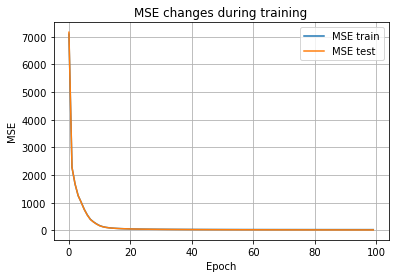

In [218]:
net2.plot_training_history()

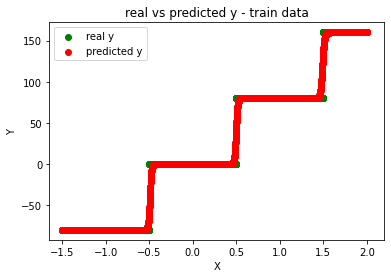

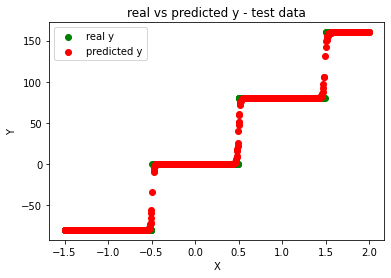

In [219]:
plot_compare_predicted_real(net2, x_train,y_train,x_test,y_test)

## Dataset 3: Multimodal Large

In [232]:
df_train = pd.read_csv('data/regression/multimodal-large-test.csv')
df_test = pd.read_csv('data/regression/multimodal-large-training.csv')
print(df_train.head())

x_train = [[x] for x in df_train.loc[:,"x"]]
y_train = [[y] for y in df_train.loc[:,"y"]]
x_test = [[x] for x in df_test.loc[:,"x"]]
y_test = [[y] for y in df_test.loc[:,"y"]]

          x           y
0  0.493292  -98.208166
1 -0.470203  -55.283891
2  1.869983  100.299997
3 -1.040446    2.720629
4 -0.616507  -75.991636


### Model 1

In [276]:
net3 = NeuralNetwork()
net3.add(Layer(neurons_count=1, add_bias=True))
net3.add(Layer(neurons_count=100, activation_fun='sigmoid', add_bias=True))
net3.add(Layer(neurons_count=1, activation_fun='linear', add_bias=False))

In [277]:
net3.train(x_train, y_train,x_test,y_test, epochs=100, learning_rate=0.00003, batch_size=4, \
            with_moment=True, moment_decay=0.9)


Epoch:    1/100,   MSE train: 5320.349,   MSE test: 5289.542
Epoch:   11/100,   MSE train: 3791.493,   MSE test:  3775.66
Epoch:   21/100,   MSE train: 3153.942,   MSE test: 3126.737
Epoch:   31/100,   MSE train: 2659.606,   MSE test: 2632.288
Epoch:   41/100,   MSE train: 2353.869,   MSE test: 2331.557
Epoch:   51/100,   MSE train: 2162.792,   MSE test: 2142.705
Epoch:   61/100,   MSE train: 2022.026,   MSE test: 2000.107
Epoch:   71/100,   MSE train: 1891.618,   MSE test: 1866.072
Epoch:   81/100,   MSE train: 1758.645,   MSE test: 1728.871
Epoch:   91/100,   MSE train:  1630.88,   MSE test: 1597.494
Epoch:  100/100,   MSE train: 1528.425,   MSE test: 1492.467


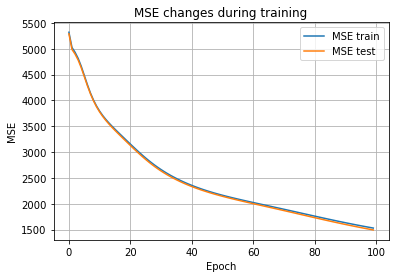

In [278]:
net3.plot_training_history()

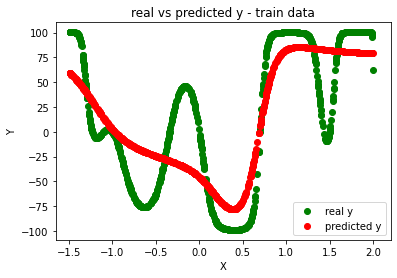

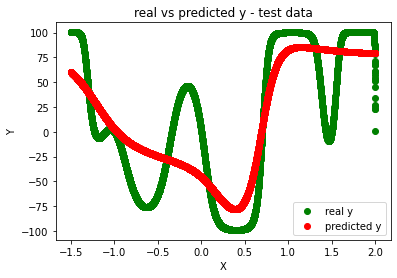

In [279]:
plot_compare_predicted_real(net3, x_train,y_train,x_test,y_test)